# Logistic Map

## Definition

$$ x_{n+1} = \mu x_n(1-x_n) $$

In [1]:
@inline function logisticmap(mu, x0, N)
    x = zeros(N)
    x[1] = x0
    for n in 2:N
        x[n] = mu*x[n-1]*(1-x[n-1])
    end
    return x
end

logisticmap (generic function with 1 method)

## Bifurcation diagram

In [2]:
N = 5000
μ_range = 2.5:0.001:4

2.5:0.001:4.0

$x_n$

In [3]:
num_of_last_points = 300
x = zeros(Float64, length(μ_range), num_of_last_points);

for (i, μ) in enumerate(μ_range)
    x_μ = logisticmap(μ, 0.5, N);
    x[i,:] = x_μ[end-num_of_last_points+1:end]
end

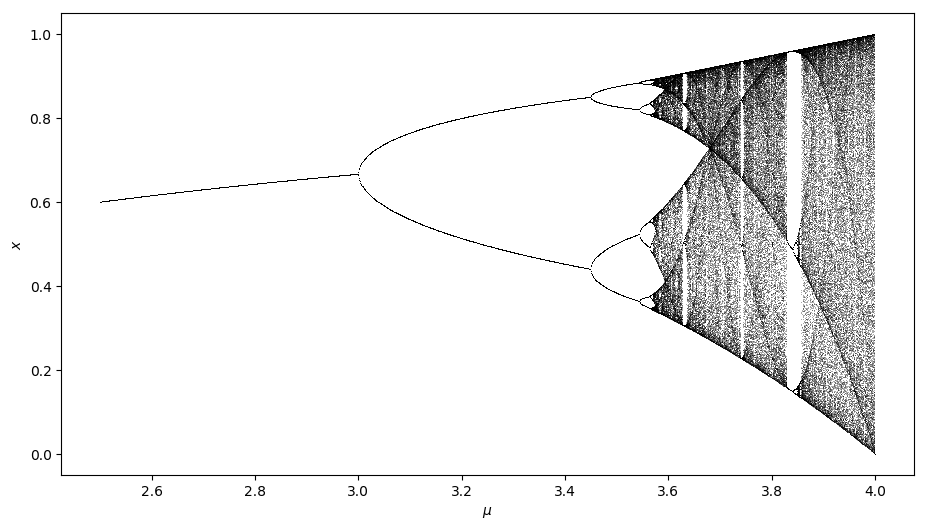

In [4]:
using PyPlot

figure(figsize=(11, 6))
for (i, μ) in enumerate(μ_range)
    scatter(ones(num_of_last_points)*μ, x[i,:], marker=".", s=0.5, linewidths=0, c="k")
end
xlabel(L"μ")
ylabel(L"x");

# 0-1 chaos test

We follow the following paper:

[1] Gottwald, G. A., & Melbourne, I. (2009). On the implementation of the 0–1 test for chaos. SIAM Journal on Applied Dynamical Systems, 8(1), 129-145. https://arxiv.org/pdf/0906.1418.pdf

In [5]:
include("..\\src\\01ChaosTest.jl");

Create two logistic maps, regular and chaotic, and denote them by $\phi_{\mathrm{regular}}$ ($\mu=2.8$) and $\phi_{\mathrm{chaotic}}$ ($\mu=3.7$)

In [6]:
N = 50000

ϕ_regular = logisticmap(2.8, 0.5, N);
ϕ_chaotic = logisticmap(3.7, 0.5, N);

### Translation variables

$$ p_c(n) = \sum_{j=1}^n \phi(j)\cos(jc),\quad q_c(n) = \sum_{j=1}^n \phi(j)\sin(jc) $$

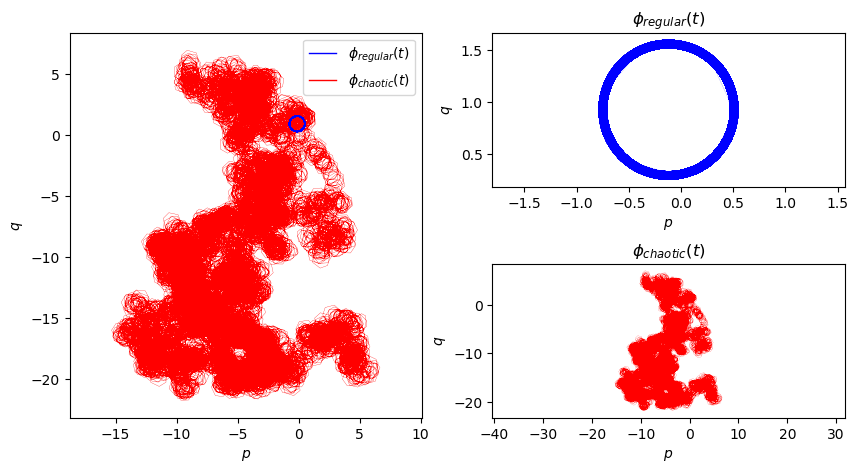

In [7]:
p_regular, q_regular = pq(ϕ_regular, 1)
p_chaotic, q_chaotic = pq(ϕ_chaotic, 1)

figure(figsize=(10, 5))

subplot(1, 2, 1)
plot(p_regular, q_regular, lw=0.2, c="b", label=L"ϕ_{regular}(t)")
plot(p_chaotic, q_chaotic, lw=0.2, c="r", label=L"ϕ_{chaotic}(t)", zorder=0)
xlabel(L"p")
ylabel(L"q")
axis("equal")
(handel -> handel.set_linewidth(1)).(legend().legendHandles)

subplots_adjust(hspace=0.5)

subplot(2, 2, 2)
title(L"ϕ_{regular}(t)")
plot(p_regular, q_regular, lw=0.1, c="b")
axis("equal")
xlabel(L"p")
ylabel(L"q")

subplot(2, 2, 4)
title(L"ϕ_{chaotic}(t)")
plot(p_chaotic, q_chaotic, lw=0.1, c="r")
axis("equal")
xlabel(L"p")
ylabel(L"q");

### Mean square displacement $M_c(n)$

$$ M_c(n) = \lim_{N\rightarrow\infty} \frac{1}{N}\sum_{j=1}^N \left \{ [p_c(j+n) - p_c(j)]^2 + [q_c(j+n) - q_c(j)]^2 \right \} $$

$$ D_c(n) = M_c(n) - V_{\mathrm{osc}}(c,n) $$
where
$$ V_{\mathrm{osc}}(c,n) = (E\phi)^2 \frac{1-\cos(nc)}{1-cos(c)}, E\phi = \lim_{N\rightarrow\infty} \frac{1}{N}\sum_{j=1}^N \phi(j)$$

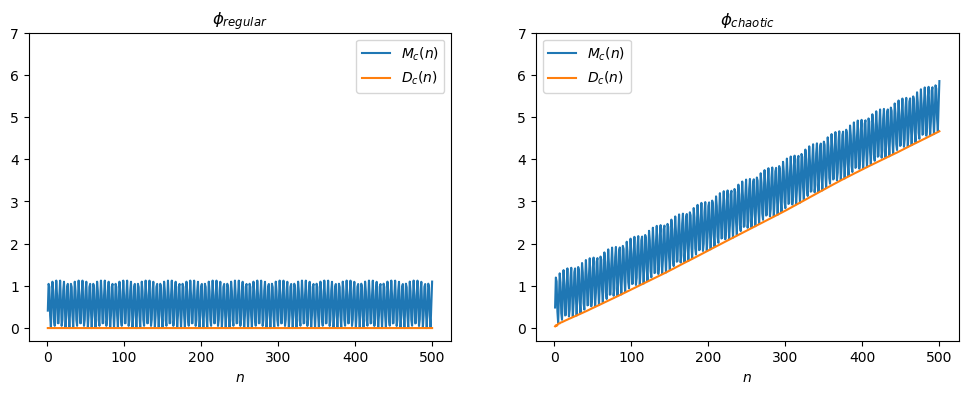

In [8]:
c = 1.3
ncut = 500
n_range = 1:ncut

Mn_chaotic = Mn_c(ϕ_chaotic, c, ncut)
Dn_chaotic = Dn_c(ϕ_chaotic, c, ncut)

Mn_regular = Mn_c(ϕ_regular, c, ncut)
Dn_regular = Dn_c(ϕ_regular, c, ncut)

figure(figsize=(12, 4))

subplot(1, 2, 1)
title(L"ϕ_{regular}")
plot(n_range, Mn_regular, label=L"M_c(n)")
plot(n_range, Dn_regular, label=L"D_c(n)")
xlabel(L"n")
ylim(-0.3, 7)
legend()

subplot(1, 2, 2)
title(L"ϕ_{chaotic}")
plot(n_range, Mn_chaotic, label=L"M_c(n)")
plot(n_range, Dn_chaotic, label=L"D_c(n)")
xlabel(L"n")
ylim(-0.3, 7)
legend();

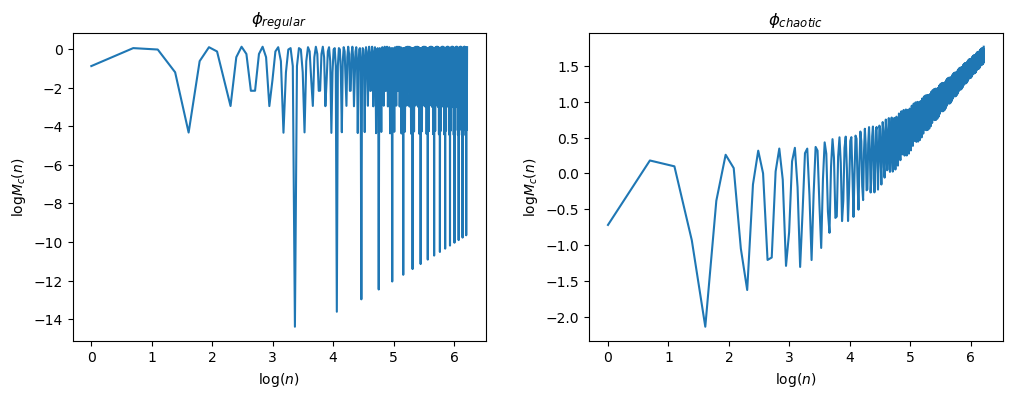

In [9]:
figure(figsize=(12, 4))
subplots_adjust(wspace=0.25)

subplot(1, 2, 1)
title(L"ϕ_{regular}")
plot(log.(n_range), log.(Mn_regular))
xlabel(L"\log(n)")
ylabel(L"\log M_c(n)")

subplot(1, 2, 2)
title(L"ϕ_{chaotic}")
plot(log.(n_range), log.(Mn_chaotic))
xlabel(L"\log(n)")
ylabel(L"\log M_c(n)");

### Computation of $K_c$

The asymptotic growth rate is $$ K_c = \lim_{n\rightarrow\infty} \frac{\log M_c(n)}{\log n} $$

#### Regression method

The regression method consists of linear regression for the log-log plot of the mean square displacement. The obtained value is the asymptotic growth rate: $$ K_c = \lim_{n\rightarrow\infty} \frac{\log M_c(n)}{\log n} $$

Since $M_c(n)$ is strictly positive, $D_c(n)$ may be negative (due to the subtraction of the oscillatory term $V_{\mathrm{osc}}(c, n)$). Therefore, we set $$ \tilde{D}_c(n) = {D}_c(n) - \min_{\{n\}}D_c(n) $$

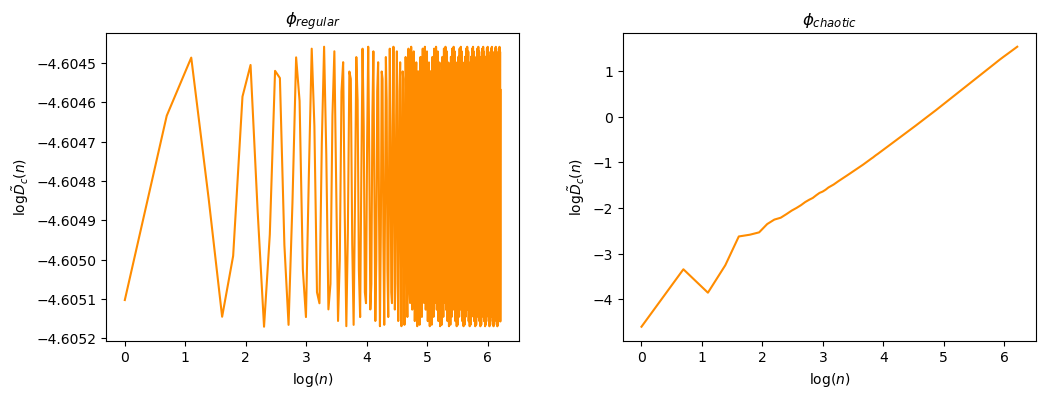

In [10]:
Dn_tilde_regular = Dn_c_tilde(ϕ_regular, c, ncut) .+ 1e-2
Dn_tilde_chaotic = Dn_c_tilde(ϕ_chaotic, c, ncut) .+ 1e-2

figure(figsize=(12, 4))
subplots_adjust(wspace=0.25)

subplot(1, 2, 1)
title(L"ϕ_{regular}")
plot(log.(n_range), log.(Dn_tilde_regular), c="darkorange")
xlabel(L"\log(n)")
ylabel(L"\log \tilde{D}_c(n)")

subplot(1, 2, 2)
title(L"ϕ_{chaotic}")
plot(log.(n_range), log.(Dn_tilde_chaotic), label=L"\log D_c(n)", c="darkorange")
xlabel(L"\log(n)")
ylabel(L"\log \tilde{D}_c(n)");

So the asymptotic growth rate can be expressed by $$ K_c = \lim_{n\rightarrow\infty} \frac{\log \tilde{D}_c(n)}{\log n} $$

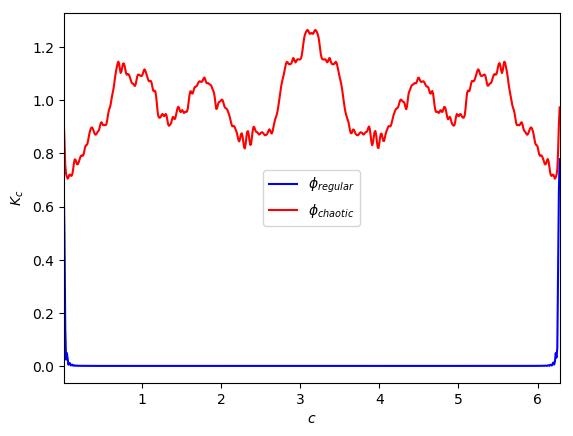

In [11]:
ncut = 200
c_range = 0.01:0.01:2π
Kc_regular = [Kc(ϕ_regular, c, ncut) for c in c_range];
Kc_chaotic = [Kc(ϕ_chaotic, c, ncut) for c in c_range];

figure()
plot(c_range, Kc_regular, label=L"ϕ_{regular}", c="b")
plot(c_range, Kc_chaotic, label=L"ϕ_{chaotic}", c="r")
xlabel(L"c")
ylabel(L"K_c")
legend()
margins(x=0)

Which value of $c$ to choose? 

To answer this question we used median of the values of $K_c$ (as described in Sec. 4 in [1]): $$ K = \mathrm{median}(K_c) $$

To obtain this we should calculate `median(K_regular)` and `median(K_chaotic)`. Alternatively, we can call `regressionmethod`.

In [12]:
K_regular = regressionmethod(ϕ_regular, 50)
K_chaotic = regressionmethod(ϕ_chaotic, 50)

println("Regression method:")
println("ϕ_regular: K = $K_regular")
println("ϕ_chaotic: K = $K_chaotic")

Regression method:
ϕ_regular: K = 7.765936486861744e-6
ϕ_chaotic: K = 0.9818313640537484


#### Correlation method

Define the vectors:
$$ \xi = (1, 2, \ldots, n_{\mathrm{cut}}), \quad \Delta = (D_c(1), D_c(2), \ldots, D_c(n_{\mathrm{cut}}) $$

Define the correlation coefficient (for a given $c$):
$$ K_c = \mathrm{corr}(\xi, \Delta) \in [-1, 1] $$

Define the correlation coefficient (for all $c$), using the median of $K_c$:
$$ K = \mathrm{median}(K_c) $$

In [13]:
K_regular = correlationmethod(ϕ_regular, 50)
K_chaotic = correlationmethod(ϕ_chaotic, 50)

println("Correlation method:")
println("ϕ_regular: K = $K_regular")
println("ϕ_chaotic: K = $K_chaotic")

Correlation method:
ϕ_regular: K = 0.016514351140248316
ϕ_chaotic: K = 0.9992469504719532


Plot of $K$ versus $\mu$ for the logistic map with $2.5 \le \mu \le 4$

In [14]:
μ_range_recuded = 2.5:0.005:4

K = correlationmethod.(logisticmap.(μ_range_recuded, 0.5, 500), 50);

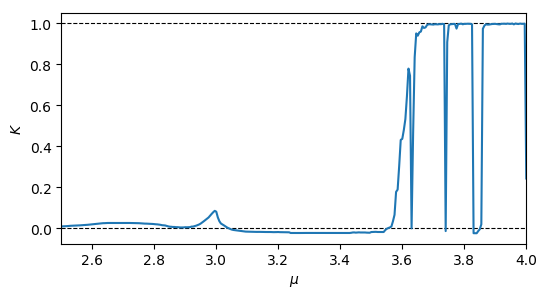

In [15]:
figure(figsize=(6, 3))
hlines([0, 1], min(μ_range_recuded...), max(μ_range_recuded...), linestyle="--", lw=0.8)
plot(μ_range_recuded, K)
xlabel(L"μ")
ylabel(L"K")
margins(x=0)

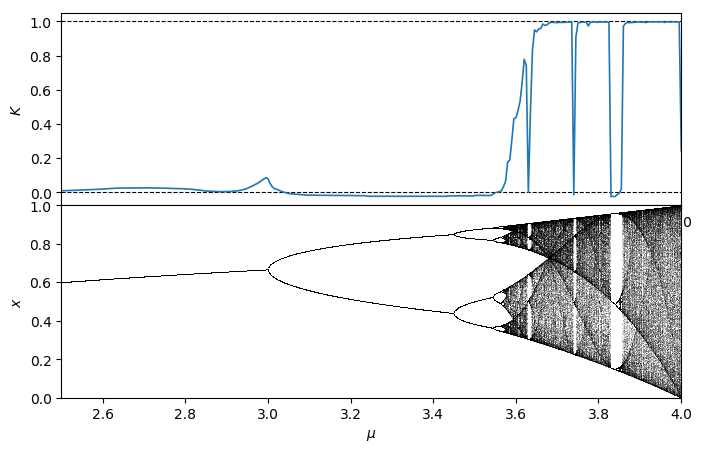

In [16]:
figure(figsize=(8, 5))
subplots_adjust(hspace=0)

subplot(2, 1, 1)
hlines([0, 1], min(μ_range_recuded...), max(μ_range_recuded...), linestyle="--", lw=0.8)
plot(μ_range_recuded, K, lw=1.2)
xlabel(L"μ")
ylabel(L"K")
margins(x=0)

subplot(2, 1, 2)
for (i, μ) in enumerate(μ_range)
    scatter(ones(num_of_last_points)*μ, x[i,:], marker=".", s=0.5, linewidths=0, c="k", alpha=0.5)
end
xlabel(L"μ")
ylabel(L"x")
ylim(0, 1)
margins(x=0)

# Summary table
Taken from [2]:



| Underlying dynamics | Dynamics of $p(n)$ and $q(n)$ | $M(n)$ | $K$ |
|---------------------|-------------------------------|--------|-----|
| regular | bounded | bounded | 0 |
| chaotic | diffusive | linear | 1 |

# References

[1] Gottwald, G. A., & Melbourne, I. (2009). On the implementation of the 0–1 test for chaos. SIAM Journal on Applied Dynamical Systems, 8(1), 129-145. https://arxiv.org/pdf/0906.1418.pdf

[2] Georg A. Gottwald and Ian Melbourne The 0-1 Test for Chaos: A review. http://www.maths.usyd.edu.au/u/gottwald/preprints/testforchaos_MPI.pdf